In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pd.read_excel('INF1340/UN_MigrantStockTotal_2015.xlsx', engine = "openpyxl" )

Unnamed: 0  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                      United Nations   
4                                 Population Division   
5           Department of Economic and Social Affairs   
6                                                 NaN   
7   Trends in International Migrant Stock: The 201...   
8                                   TABLE OF CONTENTS   
9                           POP/DB/MIG/Stock/Rev.2015   
10  December 2015 - Copyright © 2015 by United Nat...   
11  Suggested citation: United Nations, Department...   
12  Trends in International Migrant Stock: The 201...   
13                                                NaN   
14                                              TABLE   
15                                            Table 1   
16                                            Table 2   
17                                            Table 3   
18                                            Table 4   
19                                            Table 5   
20                                            Table 6   
21                                              ANNEX   
22                                              NOTES   

                                           Unnamed: 1  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12                                                NaN  
13                                                NaN  
14                                              TITLE  
15  International migrant stock at mid-year by sex...  
16  Total population at mid-year by sex and by maj...  
17  International migrant stock as a percentage of...  
18  Female migrants as a percentage of the interna...  
19  Annual rate of change of the migrant stock by ...  
20  Estimated refugee stock at mid-year by major a...  
21  Classification of countries and areas by major...  
22                                              NOTES

In [4]:
###First, I am working on sheet1 and setting the appropriate headers/cols to filter out unecessary cells 
data = pd.read_excel('INF1340/UN_MigrantStockTotal_2015.xlsx', sheet_name= "Table 1", header=15, usecols='A:W')

In [5]:
###Dropping columns that do not provide any value 
data2 = data.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [6]:
new_cols=['1990_Both', '1995_Both', '2000_Both', '2005_Both', '2010_Both', '2015_Both', '1990_Male','1995_Male', '2000_Male', '2005_Male', '2010_Male', '2015_Male', '1990_Female', '1995_Female', '2000_Female', '2005_Female', '2010_Female', '2015_Female']
data2.rename(columns=dict(zip(data2.columns[1:], new_cols)),inplace=True)

In [7]:
data2.rename(columns={'Unnamed: 1':'Region'}, inplace=True)

In [8]:
data3=data2.melt(id_vars='Region', var_name= 'Variable', value_name="International migrant stock")
variable_split = data3['Variable'].str.split('_')
data3['Year'] = variable_split.str[0]
data3['Sex'] = variable_split.str[1]

In [9]:
clean_sheet1 = data3.drop(['Variable'], axis=1)

In [10]:
sheet2_data = pd.read_excel('INF1340/UN_MigrantStockTotal_2015.xlsx', sheet_name= "Table 2", header=15)

In [11]:
clean_sheet2 = sheet2_data.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3'], axis=1)

In [12]:
clean_sheet2.rename(columns={'Unnamed: 1':'Region'}, inplace=True)

In [13]:
new_cols=['1990_Both', '1995_Both', '2000_Both', '2005_Both', '2010_Both', '2015_Both', '1990_Male','1995_Male', '2000_Male', '2005_Male', '2010_Male', '2015_Male', '1990_Female', '1995_Female', '2000_Female', '2005_Female', '2010_Female', '2015_Female']
clean_sheet2.rename(columns=dict(zip(clean_sheet2.columns[1:], new_cols)),inplace=True)

In [14]:
clean_sheet2=clean_sheet2.melt(id_vars='Region', var_name= 'Variable', value_name="Total_population")
variable_split = clean_sheet2['Variable'].str.split('_')
clean_sheet2['Year'] = variable_split.str[0]
clean_sheet2['Sex'] = variable_split.str[1]

In [15]:
clean_sheet2 = clean_sheet2.drop(['Variable'], axis=1)

In [16]:
sheet3 = pd.read_excel('INF1340/UN_MigrantStockTotal_2015.xlsx', sheet_name= "Table 3", header=15)

In [17]:
sheet3 = sheet3.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [18]:
new_cols=['1990_Both.sex', '1995_Both.sex', '2000_Both.sex', '2005_Both.sex', '2010_Both.sex', '2015_Both.sex', '1990_Male','1995_Male', '2000_Male', '2005_Male', '2010_Male', '2015_Male', '1990_Female', '1995_Female', '2000_Female', '2005_Female', '2010_Female', '2015_Female']
clean_sheet3 = sheet3.rename(columns=dict(zip(sheet3.columns[1:], new_cols)))

In [19]:
clean_sheet3=clean_sheet3.melt(id_vars='Unnamed: 1', var_name= 'Variable', value_name="International migrant stock as a percentage of the total population")
variable_split = clean_sheet3['Variable'].str.split('_')
clean_sheet3['Year'] = variable_split.str[0]
clean_sheet3['Sex'] = variable_split.str[1]

In [20]:
clean_sheet3 = clean_sheet3.drop("Variable", axis=1)

In [21]:
clean_sheet3 = clean_sheet3.rename(columns = {"Unnamed: 1" : "Region"})

In [22]:
sheet4_data = pd.read_excel("INF1340/UN_MigrantStockTotal_2015.xlsx", sheet_name = "Table 4", header = 15) 

In [23]:
clean_sheet4 = sheet4_data.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [24]:
clean_sheet4 = clean_sheet4.rename(columns = {'Unnamed: 1' : 'Region'}) 

In [25]:
clean_sheet4 = clean_sheet4.melt(id_vars = "Region", var_name = "Year", value_name = "Female migrants as a percentage of the international migrant stock") 

In [26]:
sheet5_data = pd.read_excel("INF1340/UN_MigrantStockTotal_2015.xlsx" , sheet_name = "Table 5", header = 15)

In [28]:
clean_sheet5 = sheet5_data.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
clean_sheet5

Unnamed: 1 1990-1995 1995-2000  \
0                                                WORLD  1.051865  1.428058   
1                                    Developed regions  2.275847  2.264965   
2                                   Developing regions -0.487389  0.241777   
3                            Least developed countries  1.118175 -3.001139   
4    Less developed regions excluding least develop... -0.803244  0.850177   
..                                                 ...       ...       ...   
260                                              Samoa  6.704748   4.90282   
261                                            Tokelau -0.298513 -0.303036   
262                                              Tonga  2.350316  2.359733   
263                                             Tuvalu -3.797947 -3.845134   
264                          Wallis and Futuna Islands   3.61788  3.636508   

    2000-2005  2005-2010  2010-2015 1990-1995.1 1995-2000.1 2000-2005.1  \
0    2.042124    2.95416   1.890991    1.000922    1.450294    2.151575   
1     2.50708   2.466343   1.160824    2.265595    2.279583    2.483259   
2    1.328107   3.702217   2.929634    -0.45298    0.380246    1.693824   
3   -0.539636   0.419137   3.526927    1.000073   -2.718952    0.078575   
4     1.62934   4.159339   2.852687   -0.733256    0.950231    1.952269   
..        ...        ...        ...         ...         ...         ...   
260 -0.858442  -2.299179  -0.768177    6.499035    4.704571   -1.066301   
261 -0.307698  10.169947   2.536144   -0.404054   -0.412386   -1.589283   
262  3.096969   3.099614   2.641235    2.874558    2.848819    3.228155   
263 -3.408224  -3.450671  -1.763854   -3.914892   -4.028435   -3.613401   
264  3.203177    3.20466   0.519140    3.364378    3.396526    3.189382   

    2005-2010.1  2010-2015.1 1990-1995.2 1995-2000.2 2000-2005.2 2005-2010.2  \
0      3.159228     1.912603    1.104667    1.405044     1.92808    2.737012   
1      2.265689     1.074685    2.285643    2.250995    2.529838     2.65595   
2      4.352954     2.927058   -0.526904    0.081268     0.89236    2.881555   
3      0.293964     3.363629    1.249146   -3.316818   -1.265617     0.57011   
4       4.90598     2.873490    -0.88418    0.733402    1.243624    3.212358   
..          ...          ...         ...         ...         ...         ...   
260    -2.50417    -0.987758    6.931983    5.117229   -0.638315    -2.08663   
261    8.750541     2.463246   -0.167365   -0.168777    1.152582   11.577161   
262    3.163851     2.737439    1.787022     1.80546    2.943277    3.023552   
263   -3.449385    -1.718849   -3.646431   -3.611679   -3.152579   -3.452255   
264    3.197545     0.521340    3.886601    3.884553    3.217252    3.211913   

     2010-2015.2  
0       1.867837  
1       1.241097  
2       2.933003  
3       3.720790  
4       2.825127  
..           ...  
260    -0.545343  
261     2.603250  
262     2.526318  
263    -1.819436  
264     0.516899  

[265 rows x 16 columns]

In [69]:
BothSex_list = ["1990-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2015"]
clean_sheet5 = clean_sheet5.rename(columns=lambda x: x+'.Both Sex'if x in BothSex_list else x)
clean_sheet5

Unnamed: 1 1990-1995.Both Sex  \
0                                                WORLD           1.051865   
1                                    Developed regions           2.275847   
2                                   Developing regions          -0.487389   
3                            Least developed countries           1.118175   
4    Less developed regions excluding least develop...          -0.803244   
..                                                 ...                ...   
260                                              Samoa           6.704748   
261                                            Tokelau          -0.298513   
262                                              Tonga           2.350316   
263                                             Tuvalu          -3.797947   
264                          Wallis and Futuna Islands            3.61788   

    1995-2000.Both Sex 2000-2005.Both Sex 2005-2010.Both Sex  \
0             1.428058           2.042124            2.95416   
1             2.264965            2.50708           2.466343   
2             0.241777           1.328107           3.702217   
3            -3.001139          -0.539636           0.419137   
4             0.850177            1.62934           4.159339   
..                 ...                ...                ...   
260            4.90282          -0.858442          -2.299179   
261          -0.303036          -0.307698          10.169947   
262           2.359733           3.096969           3.099614   
263          -3.845134          -3.408224          -3.450671   
264           3.636508           3.203177            3.20466   

     2010-2015.Both Sex 1990-1995.Male 1995-2000.Male 2000-2005.Male  \
0              1.890991       1.000922       1.450294       2.151575   
1              1.160824       2.265595       2.279583       2.483259   
2              2.929634       -0.45298       0.380246       1.693824   
3              3.526927       1.000073      -2.718952       0.078575   
4              2.852687      -0.733256       0.950231       1.952269   
..                  ...            ...            ...            ...   
260           -0.768177       6.499035       4.704571      -1.066301   
261            2.536144      -0.404054      -0.412386      -1.589283   
262            2.641235       2.874558       2.848819       3.228155   
263           -1.763854      -3.914892      -4.028435      -3.613401   
264            0.519140       3.364378       3.396526       3.189382   

    2005-2010.Male  2010-2015.Male 1990-1995.Female 1995-2000.Female  \
0         3.159228        1.912603         1.104667         1.405044   
1         2.265689        1.074685         2.285643         2.250995   
2         4.352954        2.927058        -0.526904         0.081268   
3         0.293964        3.363629         1.249146        -3.316818   
4          4.90598        2.873490         -0.88418         0.733402   
..             ...             ...              ...              ...   
260       -2.50417       -0.987758         6.931983         5.117229   
261       8.750541        2.463246        -0.167365        -0.168777   
262       3.163851        2.737439         1.787022          1.80546   
263      -3.449385       -1.718849        -3.646431        -3.611679   
264       3.197545        0.521340         3.886601         3.884553   

    2000-2005.Female 2005-2010.Female  2010-2015.Female  
0            1.92808         2.737012          1.867837  
1           2.529838          2.65595          1.241097  
2            0.89236         2.881555          2.933003  
3          -1.265617          0.57011          3.720790  
4           1.243624         3.212358          2.825127  
..               ...              ...               ...  
260        -0.638315         -2.08663         -0.545343  
261         1.152582        11.577161          2.603250  
262         2.943277         3.023552          2.526318  
263        -3.152579        -3.452255   

In [62]:
Male_list = ["1990-1995.1", "1995-2000.1", "2000-2005.1", "2005-2010.1", "2010-2015.1"]
clean_sheet5 = clean_sheet5.rename(columns=lambda x: x.strip().replace('.1', '.Male') if x in Male_list else x)
clean_sheet5

Unnamed: 1 1990-1995.Both Sex  \
0                                                WORLD           1.051865   
1                                    Developed regions           2.275847   
2                                   Developing regions          -0.487389   
3                            Least developed countries           1.118175   
4    Less developed regions excluding least develop...          -0.803244   
..                                                 ...                ...   
260                                              Samoa           6.704748   
261                                            Tokelau          -0.298513   
262                                              Tonga           2.350316   
263                                             Tuvalu          -3.797947   
264                          Wallis and Futuna Islands            3.61788   

    1995-2000.Both Sex 2000-2005.Both Sex 2005-2010.Both Sex  \
0             1.428058           2.042124            2.95416   
1             2.264965            2.50708           2.466343   
2             0.241777           1.328107           3.702217   
3            -3.001139          -0.539636           0.419137   
4             0.850177            1.62934           4.159339   
..                 ...                ...                ...   
260            4.90282          -0.858442          -2.299179   
261          -0.303036          -0.307698          10.169947   
262           2.359733           3.096969           3.099614   
263          -3.845134          -3.408224          -3.450671   
264           3.636508           3.203177            3.20466   

     2010-2015.Both Sex 1990-1995.Male 1995-2000.Male 2000-2005.Male  \
0              1.890991       1.000922       1.450294       2.151575   
1              1.160824       2.265595       2.279583       2.483259   
2              2.929634       -0.45298       0.380246       1.693824   
3              3.526927       1.000073      -2.718952       0.078575   
4              2.852687      -0.733256       0.950231       1.952269   
..                  ...            ...            ...            ...   
260           -0.768177       6.499035       4.704571      -1.066301   
261            2.536144      -0.404054      -0.412386      -1.589283   
262            2.641235       2.874558       2.848819       3.228155   
263           -1.763854      -3.914892      -4.028435      -3.613401   
264            0.519140       3.364378       3.396526       3.189382   

    2005-2010.Male  2010-2015.Male 1990-1995.Female 1995-2000.Female  \
0         3.159228        1.912603         1.104667         1.405044   
1         2.265689        1.074685         2.285643         2.250995   
2         4.352954        2.927058        -0.526904         0.081268   
3         0.293964        3.363629         1.249146        -3.316818   
4          4.90598        2.873490         -0.88418         0.733402   
..             ...             ...              ...              ...   
260       -2.50417       -0.987758         6.931983         5.117229   
261       8.750541        2.463246        -0.167365        -0.168777   
262       3.163851        2.737439         1.787022          1.80546   
263      -3.449385       -1.718849        -3.646431        -3.611679   
264       3.197545        0.521340         3.886601         3.884553   

    2000-2005.Female 2005-2010.Female  2010-2015.Female  
0            1.92808         2.737012          1.867837  
1           2.529838          2.65595          1.241097  
2            0.89236         2.881555          2.933003  
3          -1.265617          0.57011          3.720790  
4           1.243624         3.212358          2.825127  
..               ...              ...               ...  
260        -0.638315         -2.08663         -0.545343  
261         1.152582        11.577161          2.603250  
262         2.943277         3.023552          2.526318  
263        -3.152579        -3.452255   

In [115]:
Female_list = ["1990to1995.2", "1995to2000.2", "2000 to 2005.2", "2005 to 2010.2", "2010 to 2015.2"]
clean_sheet5 = clean_sheet5.rename(columns=lambda x: x.strip().replace('.2', '.Female') if x in Female_list else x)
clean_sheet5

Unnamed: 1 1990-1995.Both Sex  \
0                                                WORLD           1.051865   
1                                    Developed regions           2.275847   
2                                   Developing regions          -0.487389   
3                            Least developed countries           1.118175   
4    Less developed regions excluding least develop...          -0.803244   
..                                                 ...                ...   
260                                              Samoa           6.704748   
261                                            Tokelau          -0.298513   
262                                              Tonga           2.350316   
263                                             Tuvalu          -3.797947   
264                          Wallis and Futuna Islands            3.61788   

    1995-2000.Both Sex 2000-2005.Both Sex 2005-2010.Both Sex  \
0             1.428058           2.042124            2.95416   
1             2.264965            2.50708           2.466343   
2             0.241777           1.328107           3.702217   
3            -3.001139          -0.539636           0.419137   
4             0.850177            1.62934           4.159339   
..                 ...                ...                ...   
260            4.90282          -0.858442          -2.299179   
261          -0.303036          -0.307698          10.169947   
262           2.359733           3.096969           3.099614   
263          -3.845134          -3.408224          -3.450671   
264           3.636508           3.203177            3.20466   

     2010-2015.Both Sex 1990-1995.Male 1995-2000.Male 2000-2005.Male  \
0              1.890991       1.000922       1.450294       2.151575   
1              1.160824       2.265595       2.279583       2.483259   
2              2.929634       -0.45298       0.380246       1.693824   
3              3.526927       1.000073      -2.718952       0.078575   
4              2.852687      -0.733256       0.950231       1.952269   
..                  ...            ...            ...            ...   
260           -0.768177       6.499035       4.704571      -1.066301   
261            2.536144      -0.404054      -0.412386      -1.589283   
262            2.641235       2.874558       2.848819       3.228155   
263           -1.763854      -3.914892      -4.028435      -3.613401   
264            0.519140       3.364378       3.396526       3.189382   

    2005-2010.Male  2010-2015.Male 1990-1995.Female 1995-2000.Female  \
0         3.159228        1.912603         1.104667         1.405044   
1         2.265689        1.074685         2.285643         2.250995   
2         4.352954        2.927058        -0.526904         0.081268   
3         0.293964        3.363629         1.249146        -3.316818   
4          4.90598        2.873490         -0.88418         0.733402   
..             ...             ...              ...              ...   
260       -2.50417       -0.987758         6.931983         5.117229   
261       8.750541        2.463246        -0.167365        -0.168777   
262       3.163851        2.737439         1.787022          1.80546   
263      -3.449385       -1.718849        -3.646431        -3.611679   
264       3.197545        0.521340         3.886601         3.884553   

    2000-2005.Female 2005-2010.Female  2010-2015.Female  
0            1.92808         2.737012          1.867837  
1           2.529838          2.65595          1.241097  
2            0.89236         2.881555          2.933003  
3          -1.265617          0.57011          3.720790  
4           1.243624         3.212358          2.825127  
..               ...              ...               ...  
260        -0.638315         -2.08663         -0.545343  
261         1.152582        11.577161          2.603250  
262         2.943277         3.023552          2.526318  
263        -3.152579        -3.452255   

In [64]:
sheet5 = clean_sheet5.melt(id_vars = "Unnamed: 1", var_name = "Years", 
                  value_name = "Annual rate of change") 
sheet5

Unnamed: 1               Years  \
0                                                 WORLD  1990-1995.Both Sex   
1                                     Developed regions  1990-1995.Both Sex   
2                                    Developing regions  1990-1995.Both Sex   
3                             Least developed countries  1990-1995.Both Sex   
4     Less developed regions excluding least develop...  1990-1995.Both Sex   
...                                                 ...                 ...   
3970                                              Samoa    2010-2015.Female   
3971                                            Tokelau    2010-2015.Female   
3972                                              Tonga    2010-2015.Female   
3973                                             Tuvalu    2010-2015.Female   
3974                          Wallis and Futuna Islands    2010-2015.Female   

     Annual rate of change  
0                 1.051865  
1                 2.275847  
2                -0.487389  
3                 1.118175  
4                -0.803244  
...                    ...  
3970             -0.545343  
3971               2.60325  
3972              2.526318  
3973             -1.819436  
3974              0.516899  

[3975 rows x 3 columns]

In [113]:
variable_split5 = sheet5['Years'].str.split('.')
sheet5['Years'] = variable_split.str[0]
sheet5['Sex'] = variable_split.str[1]

In [114]:
sheet5

Unnamed: 1 Years  \
0                                                 WORLD  1990   
1                                     Developed regions  1990   
2                                    Developing regions  1990   
3                             Least developed countries  1990   
4     Less developed regions excluding least develop...  1990   
...                                                 ...   ...   
3970                                              Samoa  2000   
3971                                            Tokelau  2000   
3972                                              Tonga  2000   
3973                                             Tuvalu  2000   
3974                          Wallis and Futuna Islands  2000   

     Annual rate of change       Sex  
0                 1.051865  Both.sex  
1                 2.275847  Both.sex  
2                -0.487389  Both.sex  
3                 1.118175  Both.sex  
4                -0.803244  Both.sex  
...                    ...       ...  
3970             -0.545343    Female  
3971               2.60325    Female  
3972              2.526318    Female  
3973             -1.819436    Female  
3974              0.516899    Female  

[3975 rows x 4 columns]

In [131]:
clean_sheet5 = sheet5.rename(columns = {"Unnamed: 1" : "Region"})

In [350]:
clean_sheet5

Region Years  \
0                                                 WORLD  1990   
1                                     Developed regions  1990   
2                                    Developing regions  1990   
3                             Least developed countries  1990   
4     Less developed regions excluding least develop...  1990   
...                                                 ...   ...   
3970                                              Samoa  2000   
3971                                            Tokelau  2000   
3972                                              Tonga  2000   
3973                                             Tuvalu  2000   
3974                          Wallis and Futuna Islands  2000   

     Annual rate of change       Sex  
0                 1.051865  Both.sex  
1                 2.275847  Both.sex  
2                -0.487389  Both.sex  
3                 1.118175  Both.sex  
4                -0.803244  Both.sex  
...                    ...       ...  
3970             -0.545343    Female  
3971               2.60325    Female  
3972              2.526318    Female  
3973             -1.819436    Female  
3974              0.516899    Female  

[3975 rows x 4 columns]

In [132]:
sheet6_data = pd.read_excel("INF1340/UN_MigrantStockTotal_2015.xlsx", sheet_name = "Table 6", header = 15)

In [133]:
clean_6 = sheet6_data.drop(columns = {'Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'})

In [134]:
df1 = clean_6.iloc[: , :7]

In [135]:
df1 = df1.melt(id_vars = "Unnamed: 1", var_name = "Years", 
                  value_name = "Estimated refugee stock (both sex)")

In [136]:
df2 = sheet6_data[['Unnamed: 1','1990.1', '1995.1', '2000.1', '2005.1', '2010.1', '2015.1']]

In [137]:
df2 = df2.rename(columns=lambda x: x.strip().replace('.1', ' '))

In [138]:
df2 = df2.melt(id_vars = "Unnamed: 1", var_name = "Years", 
                  value_name = "Refugees as a percentage of the international migrant stock")

In [139]:
df3 = sheet6_data[['Unnamed: 1','1990-1995', '1995-2000', '2000-2005', '2010-2015']]

In [140]:
df3 = df3.melt(id_vars = "Unnamed: 1", var_name = "Years", 
                  value_name = "Annual rate of change of the refugee stock")

In [141]:
sheet6_1 = df1.rename(columns = {"Unnamed: 1" : "Region"})

In [142]:
sheet6_2 = df2.rename(columns = {"Unnamed: 1" : "Region"})

In [143]:
sheet6_3 = df3.rename(columns = {"Unnamed: 1" : "Region"})

In [144]:
############Using the clean sheets from above 

In [145]:
clean_sheet1

Region  \
0                                                 WORLD   
1                                     Developed regions   
2                                    Developing regions   
3                             Least developed countries   
4     Less developed regions excluding least develop...   
...                                                 ...   
4765                                              Samoa   
4766                                            Tokelau   
4767                                              Tonga   
4768                                             Tuvalu   
4769                          Wallis and Futuna Islands   

     International migrant stock  Year     Sex  
0                      152563212  1990    Both  
1                       82378628  1990    Both  
2                       70184584  1990    Both  
3                       11075966  1990    Both  
4                       59105261  1990    Both  
...                          ...   ...     ...  
4765                        2460  2015  Female  
4766                         254  2015  Female  
4767                        2604  2015  Female  
4768                          63  2015  Female  
4769                        1411  2015  Female  

[4770 rows x 4 columns]

In [146]:
### Looking at the data types, we can see that there are only objects. 
### This is important to note since International migrant stock should be int but is listed as object due to .. values
clean_sheet1.dtypes

Region                         object
International migrant stock    object
Year                           object
Sex                            object
dtype: object

In [147]:
### replace all the .. values to turn the column to an int data type
new_clean1 = clean_sheet1.replace(['..'], 0)

In [148]:
new_clean1.dtypes

Region                         object
International migrant stock     int64
Year                           object
Sex                            object
dtype: object

In [149]:
new_clean1

Region  \
0                                                 WORLD   
1                                     Developed regions   
2                                    Developing regions   
3                             Least developed countries   
4     Less developed regions excluding least develop...   
...                                                 ...   
4765                                              Samoa   
4766                                            Tokelau   
4767                                              Tonga   
4768                                             Tuvalu   
4769                          Wallis and Futuna Islands   

      International migrant stock  Year     Sex  
0                       152563212  1990    Both  
1                        82378628  1990    Both  
2                        70184584  1990    Both  
3                        11075966  1990    Both  
4                        59105261  1990    Both  
...                           ...   ...     ...  
4765                         2460  2015  Female  
4766                          254  2015  Female  
4767                         2604  2015  Female  
4768                           63  2015  Female  
4769                         1411  2015  Female  

[4770 rows x 4 columns]

In [150]:
###First analysis would be on the world 
df_world = (new_clean1.loc[new_clean1['Region'] == 'WORLD'])
df_world

Region  International migrant stock  Year     Sex
0     WORLD                    152563212  1990    Both
265   WORLD                    160801752  1995    Both
530   WORLD                    172703309  2000    Both
795   WORLD                    191269100  2005    Both
1060  WORLD                    221714243  2010    Both
1325  WORLD                    243700236  2015    Both
1590  WORLD                     77747510  1990    Male
1855  WORLD                     81737477  1995    Male
2120  WORLD                     87884839  2000    Male
2385  WORLD                     97866674  2005    Male
2650  WORLD                    114613714  2010    Male
2915  WORLD                    126115435  2015    Male
3180  WORLD                     74815702  1990  Female
3445  WORLD                     79064275  1995  Female
3710  WORLD                     84818470  2000  Female
3975  WORLD                     93402426  2005  Female
4240  WORLD                    107100529  2010  Female
4505  WORLD                    117584801  2015  Female

In [151]:
world_plot = sns.barplot(x = 'Year', y = 'International migrant stock', hue = 'Sex', data = df_world)
world_plot.ticklabel_format(style='plain', axis='y')

In [152]:
###Next we will look at continents
Africa_df = (new_clean1.loc[new_clean1['Region'] == 'Africa'])
Asia_df = (new_clean1.loc[new_clean1['Region'] == 'Asia'])
Europe_df = (new_clean1.loc[new_clean1['Region'] == 'Europe'])
Latin_America_and_the_Caribbean_df = (new_clean1.loc[new_clean1['Region'] == 'Latin_America_and_the_Caribbean'])
Oceania_df = (new_clean1.loc[new_clean1['Region'] == 'Oceania'])

In [153]:
continents_df = [Africa_df, Asia_df,Europe_df, Oceania_df, Latin_America_and_the_Caribbean_df]
continents_df = pd.concat(continents_df)
continents_df

Region  International migrant stock  Year     Sex
6      Africa                     15690623  1990    Both
271    Africa                     16352814  1995    Both
536    Africa                     14800306  2000    Both
801    Africa                     15191146  2005    Both
1066   Africa                     16840014  2010    Both
...       ...                          ...   ...     ...
3682  Oceania                      2486815  1995  Female
3947  Oceania                      2683884  2000  Female
4212  Oceania                      3034524  2005  Female
4477  Oceania                      3586988  2010  Female
4742  Oceania                      4101334  2015  Female

[72 rows x 4 columns]

In [154]:
###sorting Regions from decesending order 

descending_df = continents_df.sort_values('International migrant stock', ascending = False)
top_10_continents = descending_df.iloc[:10]
top_10_continents

Region  International migrant stock  Year   Sex
1451  Europe                     76145954  2015  Both
1395    Asia                     75081125  2015  Both
1186  Europe                     72374755  2010  Both
1130    Asia                     65914319  2010  Both
921   Europe                     64086824  2005  Both
656   Europe                     56271885  2000  Both
865     Asia                     53371224  2005  Both
391   Europe                     52842663  1995  Both
600     Asia                     49340815  2000  Both
126   Europe                     49219200  1990  Both

In [155]:
continents_plot = sns.lineplot(x = 'Year', y = 'International migrant stock', hue = 'Region', data = top_10_continents)
plt.gca().invert_xaxis()
continents_plot.ticklabel_format(style='plain', axis='y')

In [156]:
Asia_df

Region  International migrant stock  Year     Sex
70     Asia                     48142261  1990    Both
335    Asia                     46548225  1995    Both
600    Asia                     49340815  2000    Both
865    Asia                     53371224  2005    Both
1130   Asia                     65914319  2010    Both
1395   Asia                     75081125  2015    Both
1660   Asia                     26011875  1990    Male
1925   Asia                     25197522  1995    Male
2190   Asia                     26848671  2000    Male
2455   Asia                     29585231  2005    Male
2720   Asia                     38205140  2010    Male
2985   Asia                     43550416  2015    Male
3250   Asia                     22130386  1990  Female
3515   Asia                     21350703  1995  Female
3780   Asia                     22492144  2000  Female
4045   Asia                     23785993  2005  Female
4310   Asia                     27709179  2010  Female
4575   Asia                     31530709  2015  Female

In [157]:
sns.barplot(x = 'Year', y = 'International migrant stock', hue = 'Sex', data = Asia_df)

<AxesSubplot:xlabel='Year', ylabel='International migrant stock'>

<AxesSubplot:xlabel='Year', ylabel='International migrant stock'>

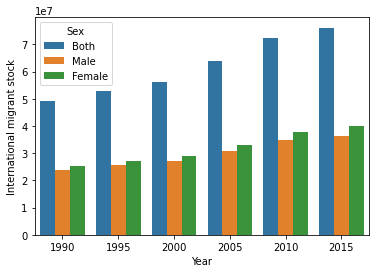

In [158]:
sns.barplot(x = 'Year', y = 'International migrant stock', hue = 'Sex', data = Europe_df)

In [159]:
###top 10 continents based on international mirgrant stock

In [160]:
clean_sheet2

Region Total_population  \
0                                                 WORLD      5309667.699   
1                                     Developed regions      1144463.062   
2                                    Developing regions      4165204.637   
3                             Least developed countries       510057.629   
4     Less developed regions excluding least develop...      3655147.008   
...                                                 ...              ...   
4765                                              Samoa           93.584   
4766                                            Tokelau               ..   
4767                                              Tonga           52.931   
4768                                             Tuvalu               ..   
4769                          Wallis and Futuna Islands               ..   

      Year     Sex  
0     1990    Both  
1     1990    Both  
2     1990    Both  
3     1990    Both  
4     1990    Both  
...    ...     ...  
4765  2015  Female  
4766  2015  Female  
4767  2015  Female  
4768  2015  Female  
4769  2015  Female  

[4770 rows x 4 columns]

In [161]:
clean_sheet2.dtypes

Region              object
Total_population    object
Year                object
Sex                 object
dtype: object

In [162]:
new_clean2 = clean_sheet2.replace(['..'], 0)

In [163]:
new_clean2.dtypes

Region               object
Total_population    float64
Year                 object
Sex                  object
dtype: object

In [164]:
world_df2 = (new_clean2.loc[new_clean2['Region'] == 'WORLD'])

In [165]:
world_plot = sns.barplot(x = 'Year', y = 'Total_population', hue = 'Sex', data = world_df2)
world_plot.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [248]:
Africa_df2 = (new_clean2.loc[new_clean2['Region'] == 'Africa'])
Asia_df2 = (new_clean2.loc[new_clean2['Region'] == 'Asia'])
Europe_df2 = (new_clean2.loc[new_clean2['Region'] == 'Europe'])
Latin_America_and_the_Caribbean_df2 = (new_clean2.loc[new_clean2['Region'] == 'Latin America and the Caribbean'])
Oceania_df2 = (new_clean2.loc[new_clean2['Region'] == 'Oceania'])

In [249]:
continents_df2 = [Africa_df2, Asia_df2,Europe_df2, Oceania_df2, Latin_America_and_the_Caribbean_df2]
continents_df2 = pd.concat(continents_df2)

In [250]:
continents_df2 = continents_df2.loc[continents_df2['Sex'] == 'Both']

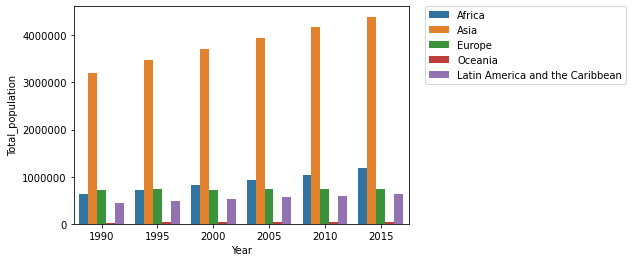

In [255]:
world_plot12 = sns.barplot(x = 'Year', y = 'Total_population', hue = 'Region', data = continents_df2)
world_plot12.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [211]:
continents_df2 = continents_df2.sort_values('Total_population', ascending = False)
top_10_continents2 = continents_df2.iloc[:10]
top_10_continents2

Region  Total_population  Year   Sex
1395    Asia       4393296.014  2015  Both
1130    Asia       4169860.387  2010  Both
865     Asia       3944669.784  2005  Both
600     Asia       3714469.832  2000  Both
335     Asia       3474848.677  1995  Both
70      Asia       3202474.692  1990  Both
1331  Africa       1186178.282  2015  Both
1066  Africa       1044106.862  2010  Both
801   Africa        920238.945  2005  Both
536   Africa        814063.149  2000  Both

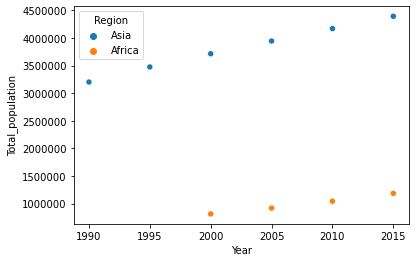

In [214]:
continents_plot = sns.scatterplot(x = 'Year', y = 'Total_population', hue = 'Region', data = top_10_continents2)
plt.gca().invert_xaxis()
continents_plot.ticklabel_format(style='plain', axis='y')

In [ ]:
##########################SHEET3####################################################################################

In [215]:
clean_sheet3

Region  \
0                                                 WORLD   
1                                     Developed regions   
2                                    Developing regions   
3                             Least developed countries   
4     Less developed regions excluding least develop...   
...                                                 ...   
4765                                              Samoa   
4766                                            Tokelau   
4767                                              Tonga   
4768                                             Tuvalu   
4769                          Wallis and Futuna Islands   

     International migrant stock as a percentage of the total population  \
0                                               2.87331                    
1                                              7.198015                    
2                                              1.685021                    
3                                              2.171513                    
4                                              1.617042                    
...                                                 ...                    
4765                                           2.628654                    
4766                                                 ..                    
4767                                           4.919612                    
4768                                                 ..                    
4769                                                 ..                    

      Year       Sex  
0     1990  Both.sex  
1     1990  Both.sex  
2     1990  Both.sex  
3     1990  Both.sex  
4     1990  Both.sex  
...    ...       ...  
4765  2015    Female  
4766  2015    Female  
4767  2015    Female  
4768  2015    Female  
4769  2015    Female  

[4770 rows x 4 columns]

In [216]:
clean_sheet3.dtypes

Region                                                                 object
International migrant stock as a percentage of the total population    object
Year                                                                   object
Sex                                                                    object
dtype: object

In [217]:
new_clean3 = clean_sheet3.replace(['..'], 0)

In [218]:
world_df3 = (new_clean3.loc[new_clean3['Region'] == 'WORLD'])

In [219]:
world_df3m = (world_df3.loc[world_df3['Sex'] == 'Male'])
world_df3m

Region  \
1590  WORLD   
1855  WORLD   
2120  WORLD   
2385  WORLD   
2650  WORLD   
2915  WORLD   

      International migrant stock as a percentage of the total population  \
1590                                           2.911430                     
1855                                           2.831583                     
2120                                           2.849206                     
2385                                           2.979124                     
2650                                           3.280341                     
2915                                           3.401900                     

      Year   Sex  
1590  1990  Male  
1855  1995  Male  
2120  2000  Male  
2385  2005  Male  
2650  2010  Male  
2915  2015  Male

In [220]:
world_df3f = (world_df3.loc[world_df3['Sex'] == 'Female'])

In [221]:
world_df3mf = (world_df3f,world_df3m)
world_df3mf = pd.concat(world_df3mf)

In [222]:
world_plot = sns.barplot(x = 'Year', y = 'International migrant stock as a percentage of the total population', hue = 'Sex', data = world_df3mf)
world_plot.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [256]:
Africa_df3 = (new_clean3.loc[new_clean3['Region'] == 'Africa'])
Asia_df3 = (new_clean3.loc[new_clean3['Region'] == 'Asia'])
Europe_df3 = (new_clean3.loc[new_clean3['Region'] == 'Europe'])
Latin_America_and_the_Caribbean_df3 = (new_clean3.loc[new_clean2['Region'] == 'Latin America and the Caribbean'])
Oceania_df3 = (new_clean3.loc[new_clean3['Region'] == 'Oceania'])

In [257]:
continents_df3 = [Africa_df3, Asia_df3,Europe_df3, Oceania_df3, Latin_America_and_the_Caribbean_df3]
continents_df3 = pd.concat(continents_df3)

In [258]:
continents_df3m = continents_df3.loc[continents_df3['Sex'] == 'Male']

In [259]:
continents_df3f = continents_df3.loc[continents_df3['Sex'] == 'Female']

In [301]:
continents_df3mf = [continents_df3m, continents_df3f]
continents_df3mf = pd.concat(continents_df3mf)

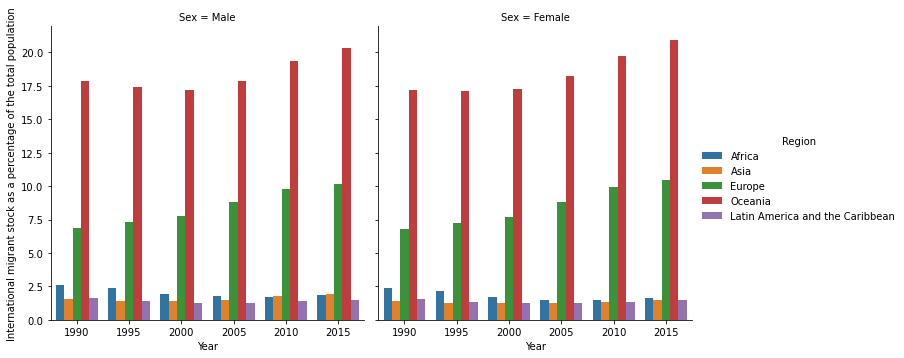

In [296]:
world_plot = sns.catplot(x = 'Year', 
                         y = 'International migrant stock as a percentage of the total population', 
                         hue = 'Region', col="Sex", 
                         kind="bar",
                         data = continents_df3mf)

In [223]:
clean_sheet4

Region  Year  \
0                                                 WORLD  1990   
1                                     Developed regions  1990   
2                                    Developing regions  1990   
3                             Least developed countries  1990   
4     Less developed regions excluding least develop...  1990   
...                                                 ...   ...   
1585                                              Samoa  2015   
1586                                            Tokelau  2015   
1587                                              Tonga  2015   
1588                                             Tuvalu  2015   
1589                          Wallis and Futuna Islands  2015   

     Female migrants as a percentage of the international migrant stock  
0                                              49.03915                  
1                                             51.123977                  
2                                             46.592099                  
3                                             47.261155                  
4                                             46.466684                  
...                                                 ...                  
1585                                          49.908704                  
1586                                          52.156057                  
1587                                          45.437096                  
1588                                          44.680851                  
1589                                           49.52615                  

[1590 rows x 3 columns]

In [269]:
clean_sheet4.dtypes

Region                                                                object
Year                                                                  object
Female migrants as a percentage of the international migrant stock    object
dtype: object

In [270]:
new_clean4 = clean_sheet4.replace(['..'], 0)

In [271]:
world_df4 = (new_clean4.loc[new_clean4['Region'] == 'WORLD'])

In [272]:
world_plot = sns.lineplot(x = 'Year', y = 'Female migrants as a percentage of the international migrant stock', linestyle='-', marker='o', data = world_df4)

In [315]:
Africa_df4 = (new_clean4.loc[new_clean4['Region'] == 'Africa'])
Asia_df4 = (new_clean4.loc[new_clean4['Region'] == 'Asia'])
Europe_df4 = (new_clean4.loc[new_clean4['Region'] == 'Europe'])
Latin_America_and_the_Caribbean_df4 = (new_clean4.loc[new_clean4['Region'] == 'Latin America and the Caribbean'])
Oceania_df4 = (new_clean4.loc[new_clean4['Region'] == 'Oceania'])

In [316]:
continents_df4 = [Africa_df4, Asia_df4,Europe_df4, Oceania_df4, Latin_America_and_the_Caribbean_df4]
continents_df4 = pd.concat(continents_df4)

In [317]:
world_plot = sns.lineplot(x = 'Year', 
                         y = 'Female migrants as a percentage of the international migrant stock', 
                         hue = 'Region',
                         data = continents_df4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [318]:
Developed_regions_df4 = (new_clean4.loc[new_clean4['Region'] == 'Developed regions'])
Developing_regions_df4 = (new_clean4.loc[new_clean4['Region'] == 'Developing regions'])

In [321]:
world_df41 = (Developed_regions_df4, Developing_regions_df4)
world_df41 = pd.concat(world_df41)
world_df41

Region  Year  \
1      Developed regions  1990   
266    Developed regions  1995   
531    Developed regions  2000   
796    Developed regions  2005   
1061   Developed regions  2010   
1326   Developed regions  2015   
2     Developing regions  1990   
267   Developing regions  1995   
532   Developing regions  2000   
797   Developing regions  2005   
1062  Developing regions  2010   
1327  Developing regions  2015   

      Female migrants as a percentage of the international migrant stock  
1                                             51.123977                   
266                                           51.149024                   
531                                           51.113307                   
796                                           51.171501                   
1061                                          51.658932                   
1326                                          51.866687                   
2                                             46.592099                   
267                                           46.500135                   
532                                           46.128444                   
797                                           45.134297                   
1062                                          43.319780                   
1327                                          43.327078

In [322]:
Develop_world_plot = sns.lineplot(x = 'Year', 
                         y = 'Female migrants as a percentage of the international migrant stock', 
                         hue = 'Region',
                         data = world_df41)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [320]:
clean_sheet5

Region Years  \
0                                                 WORLD  1990   
1                                     Developed regions  1990   
2                                    Developing regions  1990   
3                             Least developed countries  1990   
4     Less developed regions excluding least develop...  1990   
...                                                 ...   ...   
3970                                              Samoa  2000   
3971                                            Tokelau  2000   
3972                                              Tonga  2000   
3973                                             Tuvalu  2000   
3974                          Wallis and Futuna Islands  2000   

     Annual rate of change       Sex  
0                 1.051865  Both.sex  
1                 2.275847  Both.sex  
2                -0.487389  Both.sex  
3                 1.118175  Both.sex  
4                -0.803244  Both.sex  
...                    ...       ...  
3970             -0.545343    Female  
3971               2.60325    Female  
3972              2.526318    Female  
3973             -1.819436    Female  
3974              0.516899    Female  

[3975 rows x 4 columns]

In [274]:
clean_sheet5.dtypes

Region                   object
Years                    object
Annual rate of change    object
Sex                      object
dtype: object

In [275]:
new_clean5 = clean_sheet5.replace(['..'], 0)

In [276]:
world_df5 = (new_clean5.loc[new_clean5['Region'] == 'WORLD'])
world_df5

Region Years  Annual rate of change       Sex
0     WORLD  1990               1.051865  Both.sex
265   WORLD  1995               1.428058  Both.sex
530   WORLD  2000               2.042124  Both.sex
795   WORLD  2005               2.954160  Both.sex
1060  WORLD  2010               1.890991  Both.sex
1325  WORLD  2015               1.000922  Both.sex
1590  WORLD  1990               1.450294      Male
1855  WORLD  1995               2.151575      Male
2120  WORLD  2000               3.159228      Male
2385  WORLD  2005               1.912603      Male
2650  WORLD  2010               1.104667      Male
2915  WORLD  2015               1.405044      Male
3180  WORLD  1990               1.928080    Female
3445  WORLD  1995               2.737012    Female
3710  WORLD  2000               1.867837    Female

In [277]:
world_df5 = (world_df5.loc[world_df5['Sex'] == 'Both.sex'])
world_df5

Region Years  Annual rate of change       Sex
0     WORLD  1990               1.051865  Both.sex
265   WORLD  1995               1.428058  Both.sex
530   WORLD  2000               2.042124  Both.sex
795   WORLD  2005               2.954160  Both.sex
1060  WORLD  2010               1.890991  Both.sex
1325  WORLD  2015               1.000922  Both.sex

In [278]:
world_plot = sns.barplot(x = 'Years', y = 'Annual rate of change', data = world_df5)
world_plot.ticklabel_format(style='plain', axis='y')

In [323]:
Africa_df5 = (new_clean5.loc[new_clean5['Region'] == 'Africa'])
Asia_df5 = (new_clean5.loc[new_clean5['Region'] == 'Asia'])
Europe_df5 = (new_clean5.loc[new_clean5['Region'] == 'Europe'])
Latin_America_and_the_Caribbean_df5 = (new_clean5.loc[new_clean5['Region'] == 'Latin America and the Caribbean'])
Oceania_df5 = (new_clean5.loc[new_clean5['Region'] == 'Oceania'])

In [326]:
continents_df5 = [Africa_df5, Asia_df5,Europe_df5, Oceania_df5, Latin_America_and_the_Caribbean_df5]
continents_df5 = pd.concat(continents_df5)
continents_df5

Region Years  Annual rate of change       Sex
6                              Africa  1990               0.826734  Both.sex
271                            Africa  1995              -1.995043  Both.sex
536                            Africa  2000               0.521298  Both.sex
801                            Africa  2005               2.060902  Both.sex
1066                           Africa  2010               4.078721  Both.sex
...                               ...   ...                    ...       ...
2829  Latin America and the Caribbean  2010              -1.317819      Male
3094  Latin America and the Caribbean  2015              -0.301938      Male
3359  Latin America and the Caribbean  1990               1.983938    Female
3624  Latin America and the Caribbean  1995               2.622210    Female
3889  Latin America and the Caribbean  2000               2.288607    Female

[75 rows x 4 columns]

In [349]:
continents_df5m = (continents_df5.loc[continents_df5['Sex'] == 'Male'])
continents_df5f = (continents_df5.loc[continents_df5['Sex'] == 'Female'])
continents_df5f

Region Years  Annual rate of change     Sex
3186                           Africa  1990               0.045343  Female
3451                           Africa  1995               2.281516  Female
3716                           Africa  2000               3.996510  Female
3250                             Asia  1990               1.118616  Female
3515                             Asia  1995               3.053337  Female
3780                             Asia  2000               2.583965  Female
3306                           Europe  1990               2.659415  Female
3571                           Europe  1995               2.562616  Female
3836                           Europe  2000               1.121519  Female
3417                          Oceania  1990               2.455792  Female
3682                          Oceania  1995               3.345166  Female
3947                          Oceania  2000               2.679989  Female
3359  Latin America and the Caribbean  1990               1.983938  Female
3624  Latin America and the Caribbean  1995               2.622210  Female
3889  Latin America and the Caribbean  2000               2.288607  Female

In [347]:
continents_df5mf = [continents_df5m, continents_df5f]
continents_df5mf = pd.concat(continents_df5mf)
continents_df5mf

Region Years  Annual rate of change     Sex
1596                           Africa  1990              -1.848117    Male
1861                           Africa  1995               0.932749    Male
2126                           Africa  2000               1.872454    Male
2391                           Africa  2005               4.149396    Male
2656                           Africa  2010               0.857926    Male
2921                           Africa  2015              -2.159983    Male
1660                             Asia  1990               1.269413    Male
1925                             Asia  1995               1.941179    Male
2190                             Asia  2000               5.113896    Male
2455                             Asia  2005               2.618984    Male
2720                             Asia  2010              -0.717339    Male
2985                             Asia  2015               1.041629    Male
1716                           Europe  1990               1.211037    Male
1981                           Europe  1995               2.538277    Male
2246                           Europe  2000               2.291735    Male
2511                           Europe  2005               0.900411    Male
2776                           Europe  2010               1.475022    Male
3041                           Europe  2015               1.301226    Male
1827                          Oceania  1990               1.080125    Male
2092                          Oceania  1995               2.210557    Male
2357                          Oceania  2000               3.375269    Male
2622                          Oceania  2005               2.450290    Male
2887                          Oceania  2010               1.424813    Male
3152                          Oceania  2015               1.525244    Male
1769  Latin America and the Caribbean  1990              -0.398563    Male
2034  Latin America and the Caribbean  1995               1.810258    Male
2299  Latin America and the Caribbean  2000               2.585015    Male
2564  Latin America and the Caribbean  2005               2.272761    Male
2829  Latin America and the Caribbean  2010              -1.317819    Male
3094  Latin America and the Caribbean  2015              -0.301938    Male
3186                           Africa  1990               0.045343  Female
3451                           Africa  1995               2.281516  Female
3716                           Africa  2000               3.996510  Female
3250                             Asia  1990               1.118616  Female
3515                             Asia  1995               3.053337  Female
3780                             Asia  2000               2.583965  Female
3306                           Europe  1990               2.659415  Female
3571                           Europe  1995               2.562616  Female
3836                           Europe  2000               1.121519  Female
3417                          Oceania  1990               2.455792  Female
3682                          Oceania  1995               3.345166  Female
3947                          Oceania  2000               2.679989  Female
3359  Latin America and the Caribbean  1990               1.983938  Female
3624  Latin America and the Caribbean  1995               2.622210  Female
3889  Latin America and the Caribbean  2000               2.288607  Female

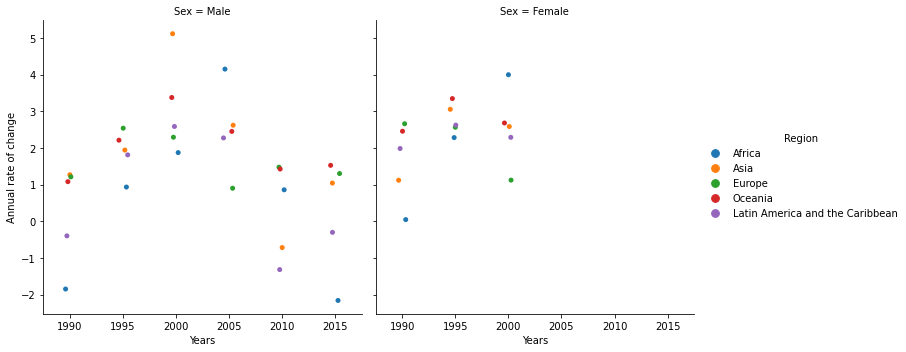

In [348]:
continents_df5_plot = sns.catplot(x = 'Years', 
                         y = 'Annual rate of change', 
                         hue = 'Region',
                         col = 'Sex',
                         data = continents_df5mf)

In [279]:
### Sheet 6 will be seperated into three different graphs since the table contains three different units

In [280]:
sheet6_1

Region Years  \
0                                                 WORLD  1990   
1                                     Developed regions  1990   
2                                    Developing regions  1990   
3                             Least developed countries  1990   
4     Less developed regions excluding least develop...  1990   
...                                                 ...   ...   
1585                                              Samoa  2015   
1586                                            Tokelau  2015   
1587                                              Tonga  2015   
1588                                             Tuvalu  2015   
1589                          Wallis and Futuna Islands  2015   

     Estimated refugee stock (both sex)  
0                              18836571  
1                               2014564  
2                              16822007  
3                               5048391  
4                              11773616  
...                                 ...  
1585                                  0  
1586                                  0  
1587                                  0  
1588                                  0  
1589                                  0  

[1590 rows x 3 columns]

In [281]:
sheet6_1.dtypes 

Region                                object
Years                                 object
Estimated refugee stock (both sex)    object
dtype: object

In [282]:
clean_sheet6_1 = sheet6_1.replace(['..'], 0)

In [283]:
clean_sheet6_1.dtypes

Region                                object
Years                                  int64
Estimated refugee stock (both sex)     int64
dtype: object

In [284]:
world_df6_1 = (clean_sheet6_1.loc[clean_sheet6_1['Region'] == 'WORLD'])
world_df6_1

Region  Years  Estimated refugee stock (both sex)
0     WORLD   1990                            18836571
265   WORLD   1995                            17853840
530   WORLD   2000                            15827803
795   WORLD   2005                            13276733
1060  WORLD   2010                            15370755
1325  WORLD   2015                            19577474

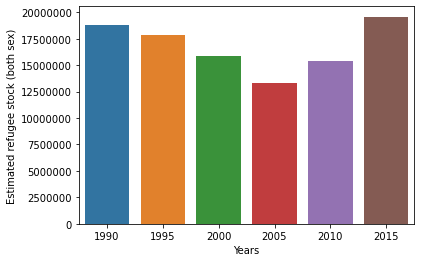

In [285]:
world_plot6_1 = sns.barplot(x = 'Years', y = 'Estimated refugee stock (both sex)', data = world_df6_1)
world_plot6_1.ticklabel_format(style='plain', axis='y')

In [286]:
sheet6_2

Region  Years  \
0                                                 WORLD  1990    
1                                     Developed regions  1990    
2                                    Developing regions  1990    
3                             Least developed countries  1990    
4     Less developed regions excluding least develop...  1990    
...                                                 ...    ...   
1585                                              Samoa  2015    
1586                                            Tokelau  2015    
1587                                              Tonga  2015    
1588                                             Tuvalu  2015    
1589                          Wallis and Futuna Islands  2015    

     Refugees as a percentage of the international migrant stock  
0                                             12.346732           
1                                              2.445494           
2                                             23.968236           
3                                              45.56588           
4                                             19.919743           
...                                                 ...           
1585                                                0.0           
1586                                                0.0           
1587                                                0.0           
1588                                                0.0           
1589                                                0.0           

[1590 rows x 3 columns]

In [287]:
sheet6_2.dtypes

Region                                                         object
Years                                                          object
Refugees as a percentage of the international migrant stock    object
dtype: object

In [288]:
cleansheet6_2 = sheet6_2.replace(['..'], 0)

In [289]:
world_df6_2 = (cleansheet6_2.loc[cleansheet6_2['Region'] == 'WORLD'])

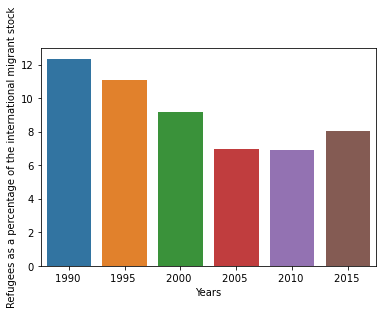

In [290]:
world_plot6_2 = sns.barplot(x = 'Years', y = 'Refugees as a percentage of the international migrant stock', data = world_df6_2)

In [291]:
sheet6_3

Region      Years  \
0                                                 WORLD  1990-1995   
1                                     Developed regions  1990-1995   
2                                    Developing regions  1990-1995   
3                             Least developed countries  1990-1995   
4     Less developed regions excluding least develop...  1990-1995   
...                                                 ...        ...   
1055                                              Samoa  2010-2015   
1056                                            Tokelau  2010-2015   
1057                                              Tonga  2010-2015   
1058                                             Tuvalu  2010-2015   
1059                          Wallis and Futuna Islands  2010-2015   

     Annual rate of change of the refugee stock  
0                                     -2.123497  
1                                      9.388424  
2                                     -2.839417  
3                                     -0.680327  
4                                       -4.3836  
...                                         ...  
1055                                         ..  
1056                                         ..  
1057                                         ..  
1058                                         ..  
1059                                         ..  

[1060 rows x 3 columns]

In [ ]:
clean_sheet6_3 = sheet6_3.replace(['..'], 0)

In [ ]:
world_df_sheet6_3 = clean_sheet6_3.loc[clean_sheet6_3['Region'] == 'WORLD']

In [ ]:
worldwide_plot6_3 = sns.lineplot(x = 'Years', y = 'Annual rate of change of the refugee stock', linestyle='-', marker='o', data = world_df_sheet6_3)